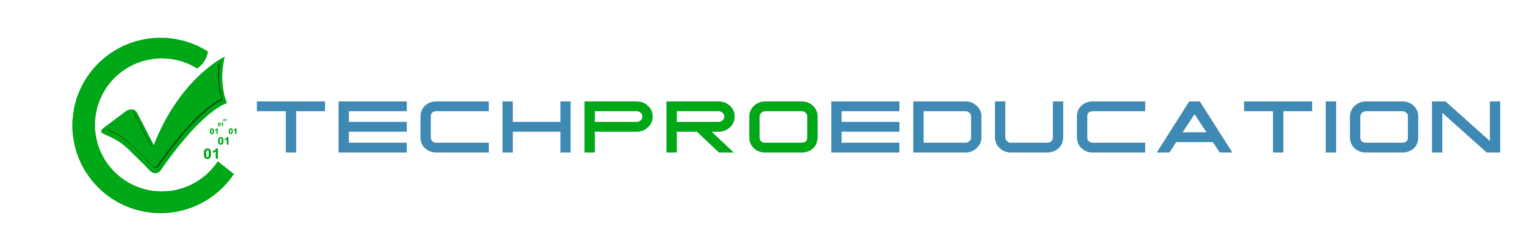

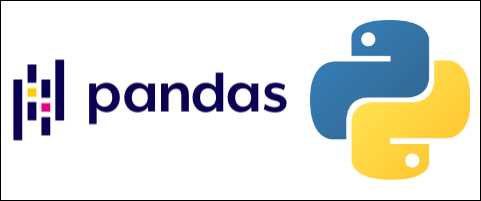

# Importing Libraries

In [7]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# apply() & applymap() & map()

apply(): DataFrame veya Seri üzerinde bir satır veya sütun boyunca bir işlem yapmak için kullanılır.

applymap(): DataFrame'in tamamı üzerinde öğe bazında işlem için kullanılır.

map(): Yalnızca Seri lerde kullanılabilir ve Seri nin her bir elemanına uygulanacak bir işlem için kullanılır.

[apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html)
[applymap](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.applymap.html)
[map](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html)

[SOUREC01](https://www.geeksforgeeks.org/python-pandas-apply/), 
[SOURCE02](https://www.datacamp.com/community/tutorials/pandas-apply),
[SOURCE03](https://sparkbyexamples.com/pandas/pandas-apply-function-usage-examples/),
[SOURCE04](https://realpython.com/python-map-function/#:~:text=Python's%20map()%20is%20a,them%20into%20a%20new%20iterable.),
[SOURCE05](https://www.w3resource.com/pandas/series/series-map.php),
[SOURCE06](https://towardsdatascience.com/introduction-to-pandas-apply-applymap-and-map-5d3e044e93ff#:~:text=apply()%20is%20used%20to,a%20Series%20with%20another%20value.),
[SOURCE07](https://stackoverflow.com/questions/19798153/difference-between-map-applymap-and-apply-methods-in-pandas) &
[SOURCE08](https://medium.com/@akaivdo/how-to-use-map-apply-applymap-methods-in-pandas-ddde5f2140bd)

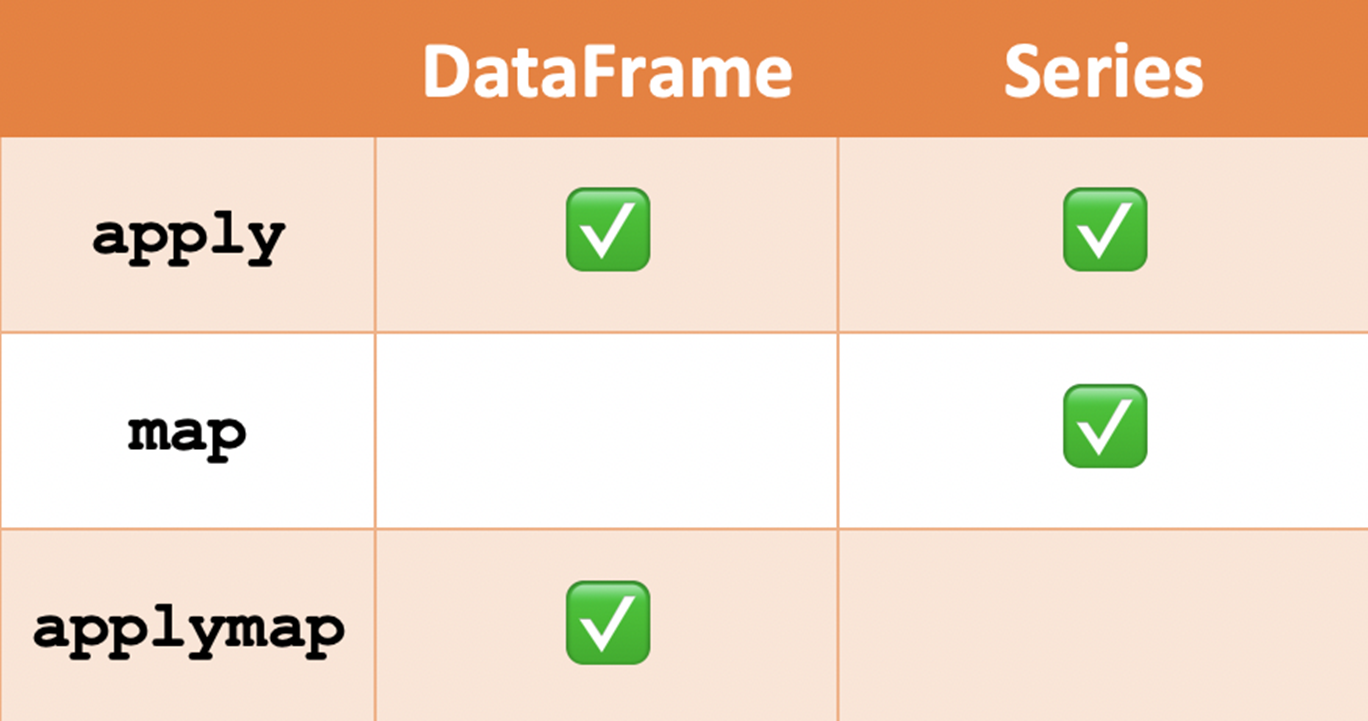

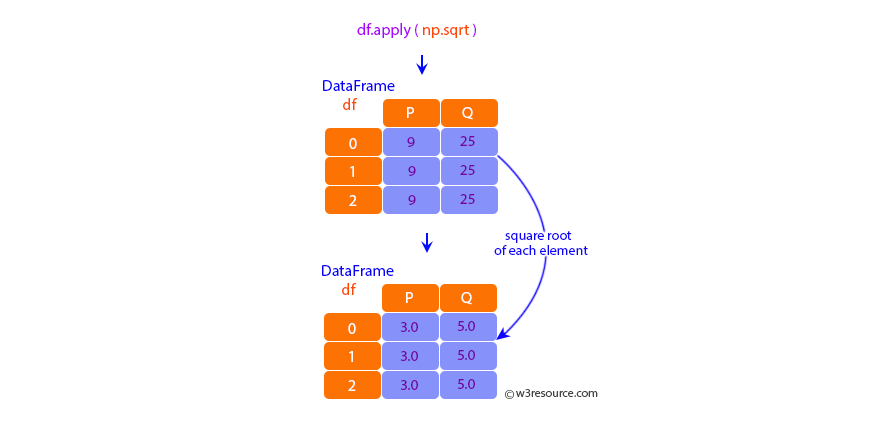

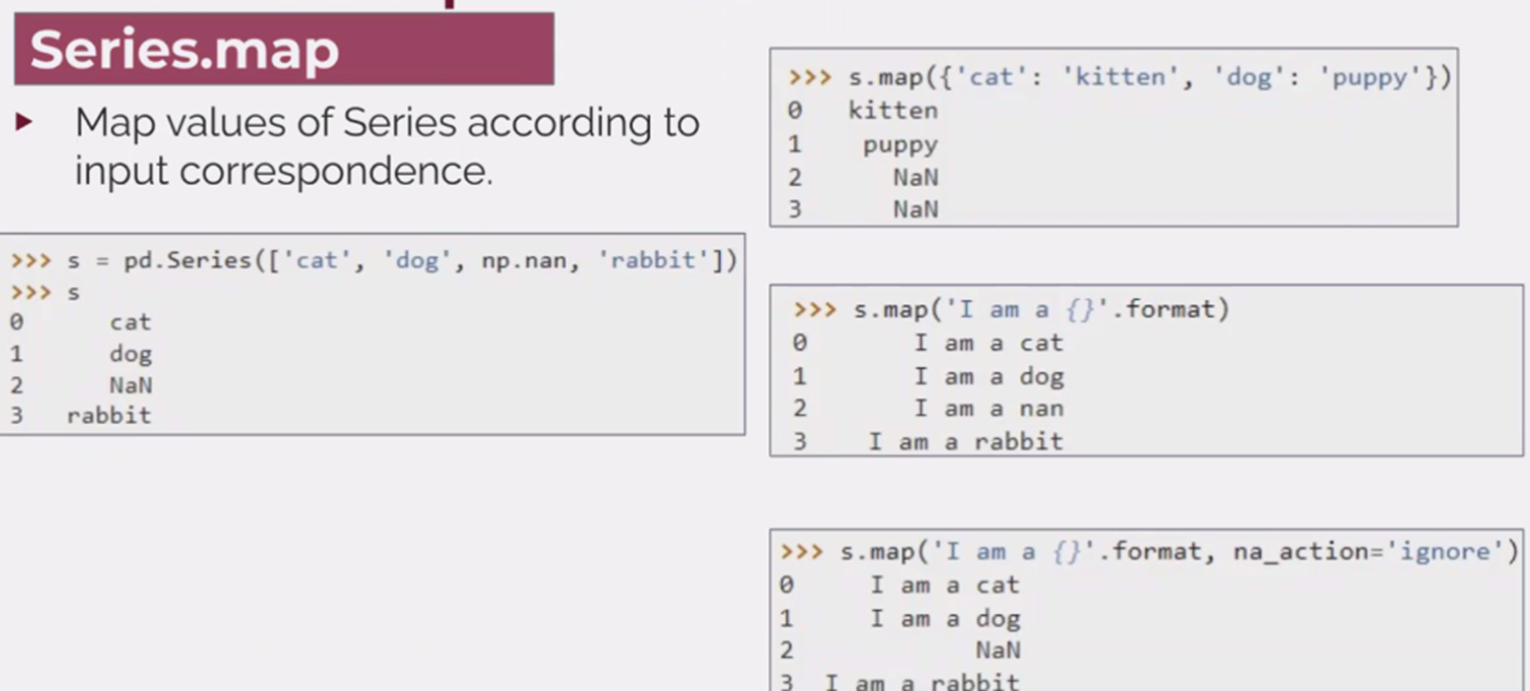

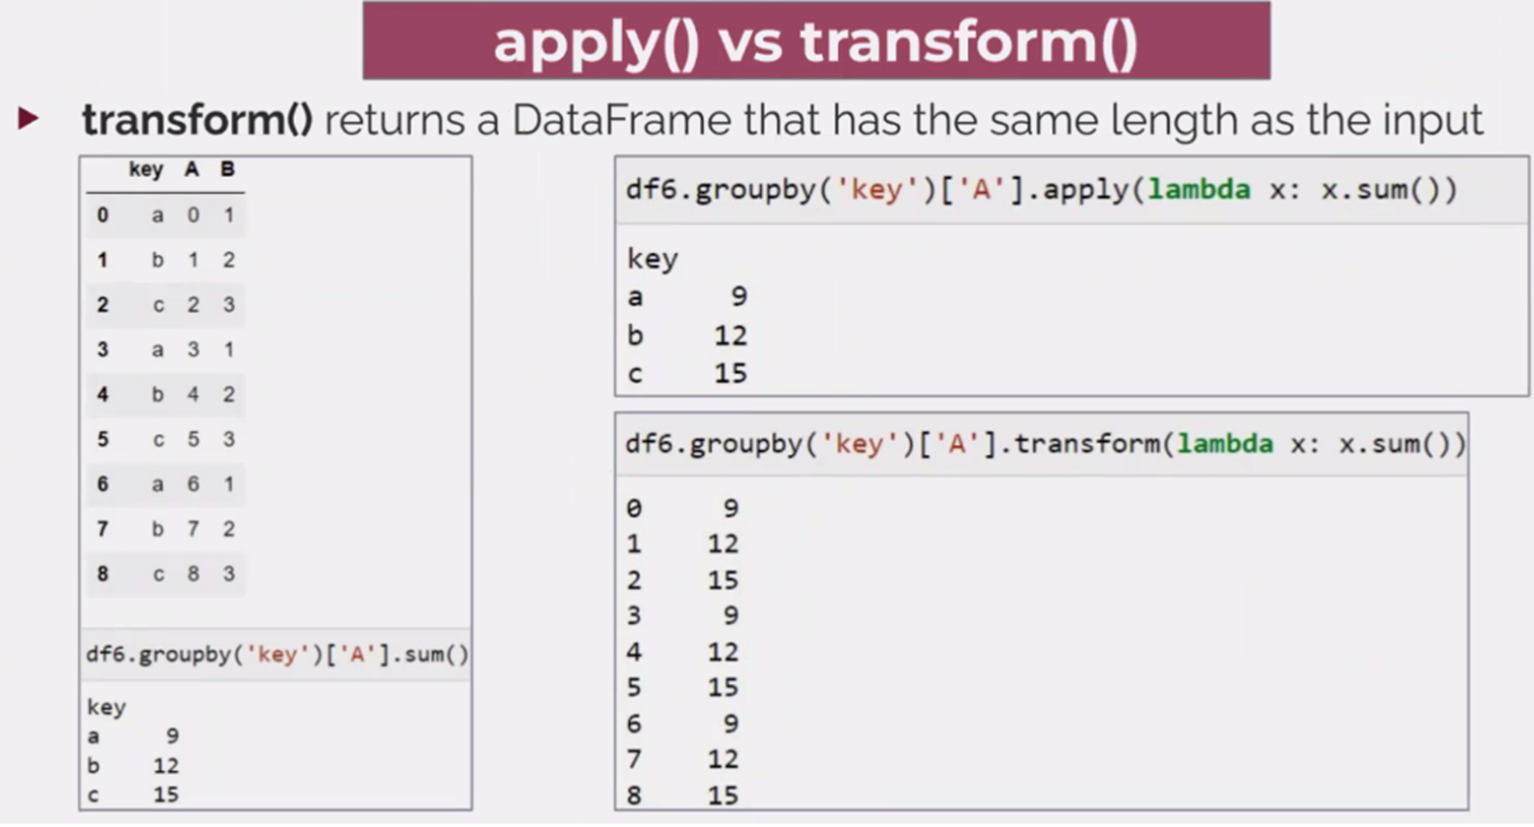

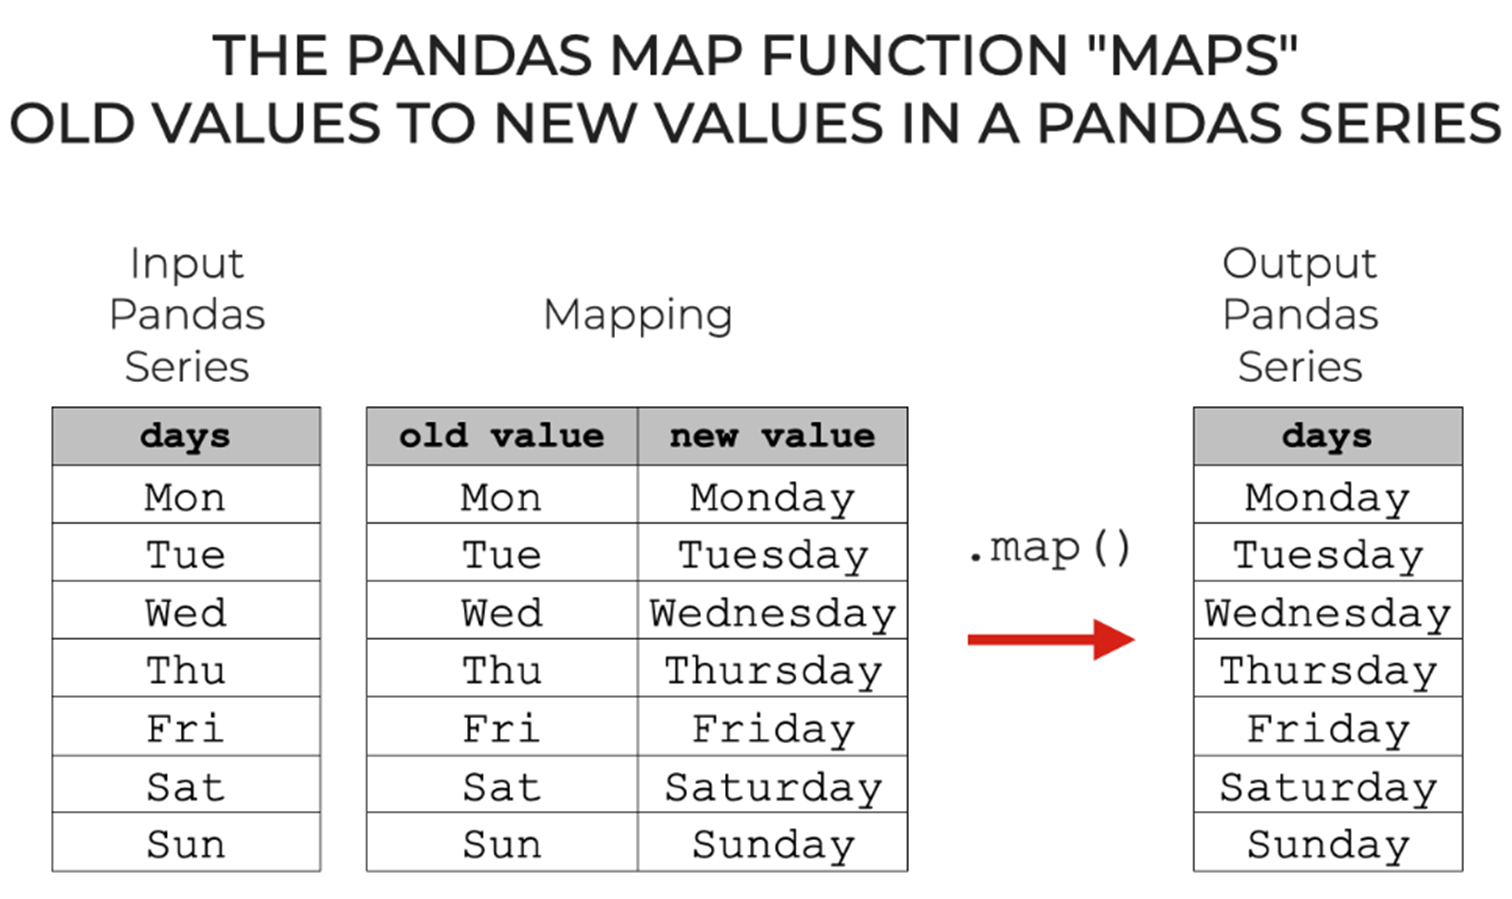

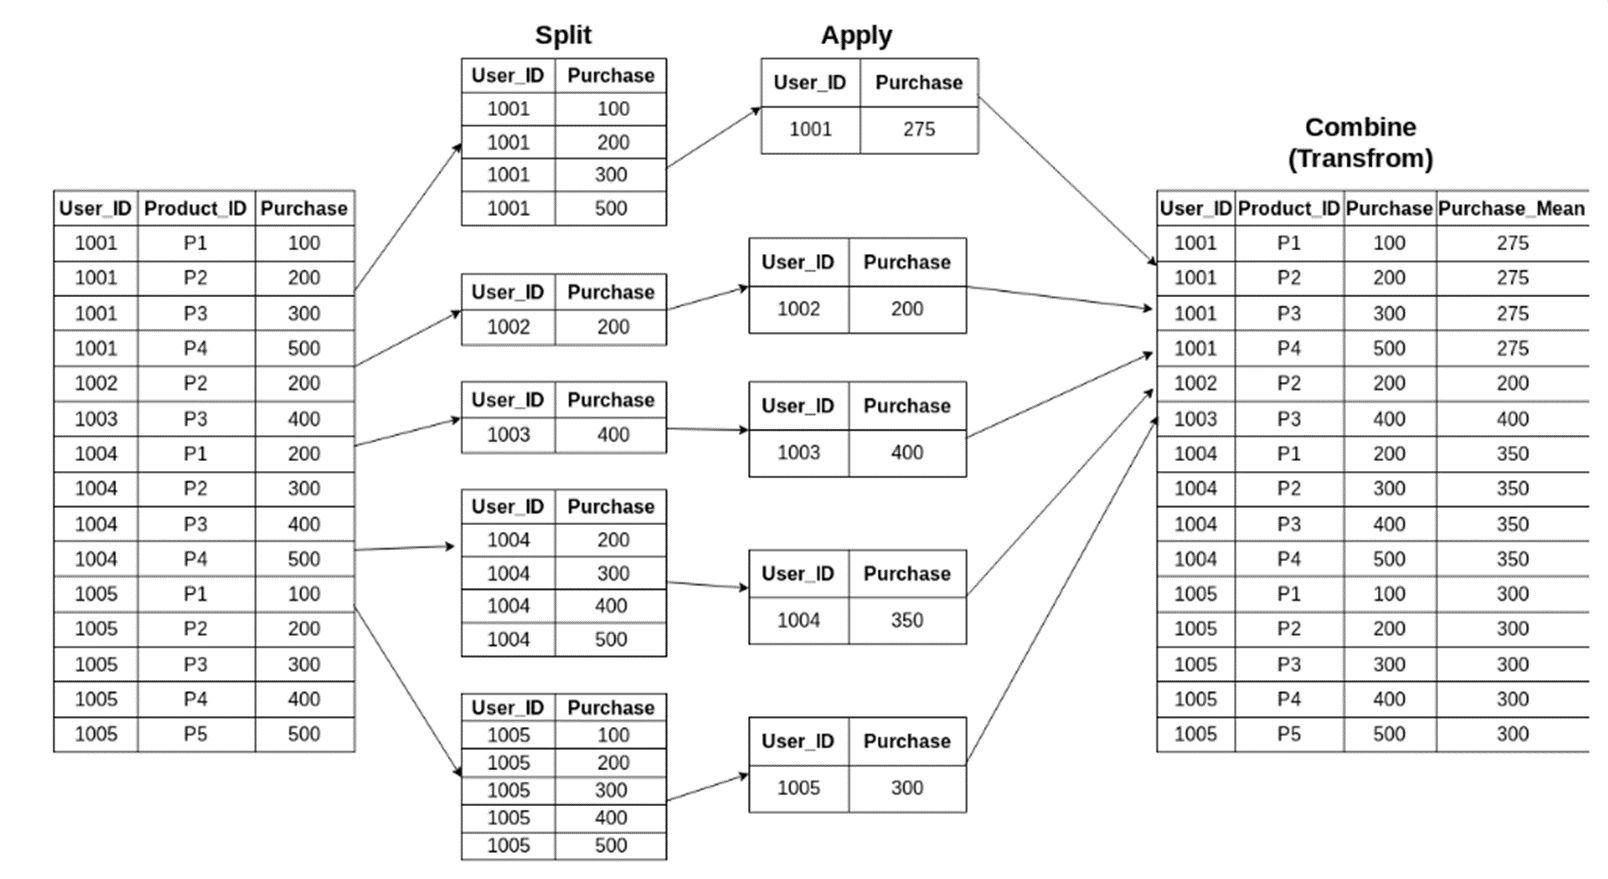

In [8]:
data = {'Company':['Amazon', 'Amazon', 'OpenAI', 'OpenAI', 'Amazon', 'OpenAI', 'Amazon', 'OpenAI'],
        'Department':['IT', 'HR', 'IT', 'HR', 'IT', 'HR', 'HR', 'IT'],
        'Person':['Ahmet', 'Ece', 'Fatma', 'Mehmet', 'Zeynep', 'Ali', 'Yusuf', 'Elif'],
        'Age':[32, 26, 35, 40, 25, 38, 30, 28],
        'Sales':[180, 160, 150, 180, 240, 200, 220, 160]}
df = pd.DataFrame(data)
df

Company Department  Person  Age  Sales
0  Amazon         IT   Ahmet   32    180
1  Amazon         HR     Ece   26    160
2  OpenAI         IT   Fatma   35    150
3  OpenAI         HR  Mehmet   40    180
4  Amazon         IT  Zeynep   25    240
5  OpenAI         HR     Ali   38    200
6  Amazon         HR   Yusuf   30    220
7  OpenAI         IT    Elif   28    160

In [15]:
df_num =df.iloc[:,3:]
df_num

Age  Sales
0   32    180
1   26    160
2   35    150
3   40    180
4   25    240
5   38    200
6   30    220
7   28    160

In [16]:
df.num.applymap(lambda x: x*10) #herbir digeri 10 ile carp
#lambda kullanip icindeki sayilari bir sayi ile carpmak isiyorum diyelim

AttributeError: 'DataFrame' object has no attribute 'num'

In [ ]:
#transform ozellikle groupby yapinca anlamli oluyordu


In [12]:
df.num.transform(lambda x: x*10)

AttributeError: 'DataFrame' object has no attribute 'num'

In [11]:
df.groupby("Company")["Age"].transform("mean")
#yanina bir aggregate func kullanmam gerekiyordu.
#burdaki degerleri donustur diyorum, meanini alarak mesela


0    28.25
1    28.25
2    35.25
3    35.25
4    28.25
5    35.25
6    28.25
7    35.25
Name: Age, dtype: float64

In [ ]:
#applymap her eleman ozelinde islem yapiyordu.
#seriler uzerinde islem yapamiyordu. hata veriyor
#transformu bu amacla kullanirken, applymap'i kullanamiyorduk

In [13]:
df.groupby("Company")["Age"].applymap("mean")

AttributeError: 'SeriesGroupBy' object has no attribute 'applymap'

In [14]:
#transform ile applymap arasindaki bir fark da, applymap'de agg func kullanamiyorum

df.applymap(lambda x: len(str(x)))
#herbir hucredeki elemanin karakterini saydiriyor


Company  Department  Person  Age  Sales
0        6           2       5    2      3
1        6           2       3    2      3
2        6           2       5    2      3
3        6           2       6    2      3
4        6           2       6    2      3
5        6           2       3    2      3
6        6           2       5    2      3
7        6           2       4    2      3

In [ ]:
#sutun ya da satir bazinda islem yapmak istersen apply, 
#herbir elemana islem yapmak istersen applymap  kullanirsin

In [17]:
df.apply(lambda x: len(str(x)))
#apply ise satir ya da sutun bazinda islem yapti
#burda sutun bazinda aldi, mesela company'de toplam 124 karakter oldugunu getirdi
#karakter olarak ascii degerlerin uzunlugnu getiriyor.
#applymap'de dogrudan length almisti
# apply'da ascii

Company       124
Department     95
Person        123
Age            87
Sales          97
dtype: int64

In [20]:
df_num.apply(np.sum)
#ben bunu apply yaptigim zaman sum olarak kullanabildim, gruplandirarak yapiyor

Age       254
Sales    1490
dtype: int64

In [21]:
df_num.apply(np.sum, axis=1)
#bu da axis=1'e gore toplayarak getiriyor

0    212
1    186
2    185
3    220
4    265
5    238
6    250
7    188
dtype: int64

In [23]:
df.groupby("Company").transform(np.mean)
#transforma agg func yazdigim zaman elementwise calisiyor


Age  Sales
0  28.25  200.0
1  28.25  200.0
2  35.25  172.5
3  35.25  172.5
4  28.25  200.0
5  35.25  172.5
6  28.25  200.0
7  35.25  172.5

In [22]:
df.groupby("Company").apply(np.mean)
#apply tek tek elemanlari yazmiyordu.gruplandirmis olarak getiriyordu

Age  Sales
Company              
Amazon   28.25  200.0
OpenAI   35.25  172.5

In [ ]:
#map()denersek nolur. atama yapiyordu. serideki elemanlari degistirebiliyorduk

In [24]:
df.Person.map({"Ahmet" : "A", "Fatma" :"F"})
#icine key ve value iceren sozluk yapisi kullaniriz.
#nan deger istemiyorsam hepsini girmem gerekiyor
#yoksa girdiklerim haricinde nan dodnurur

0      A
1    NaN
2      F
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
Name: Person, dtype: object

In [ ]:
df.Department(map{"IT" : "O", "HR" : 1})
#IT gordugune 0'i, HR gordugune 1'i koydu.
#icindeki tek tek elemanlari degistirmek icin kullaniyoruz
#sutunlari sayisala donustururken kullaniyoruz daha cok
#bazi metodlarda atama yapmamiz gerekiyor
#ya inplace=True diyeceksin, ya da atama yapacaksin kalici degisiklik icin bunda

# pivot() vs pivot_table()

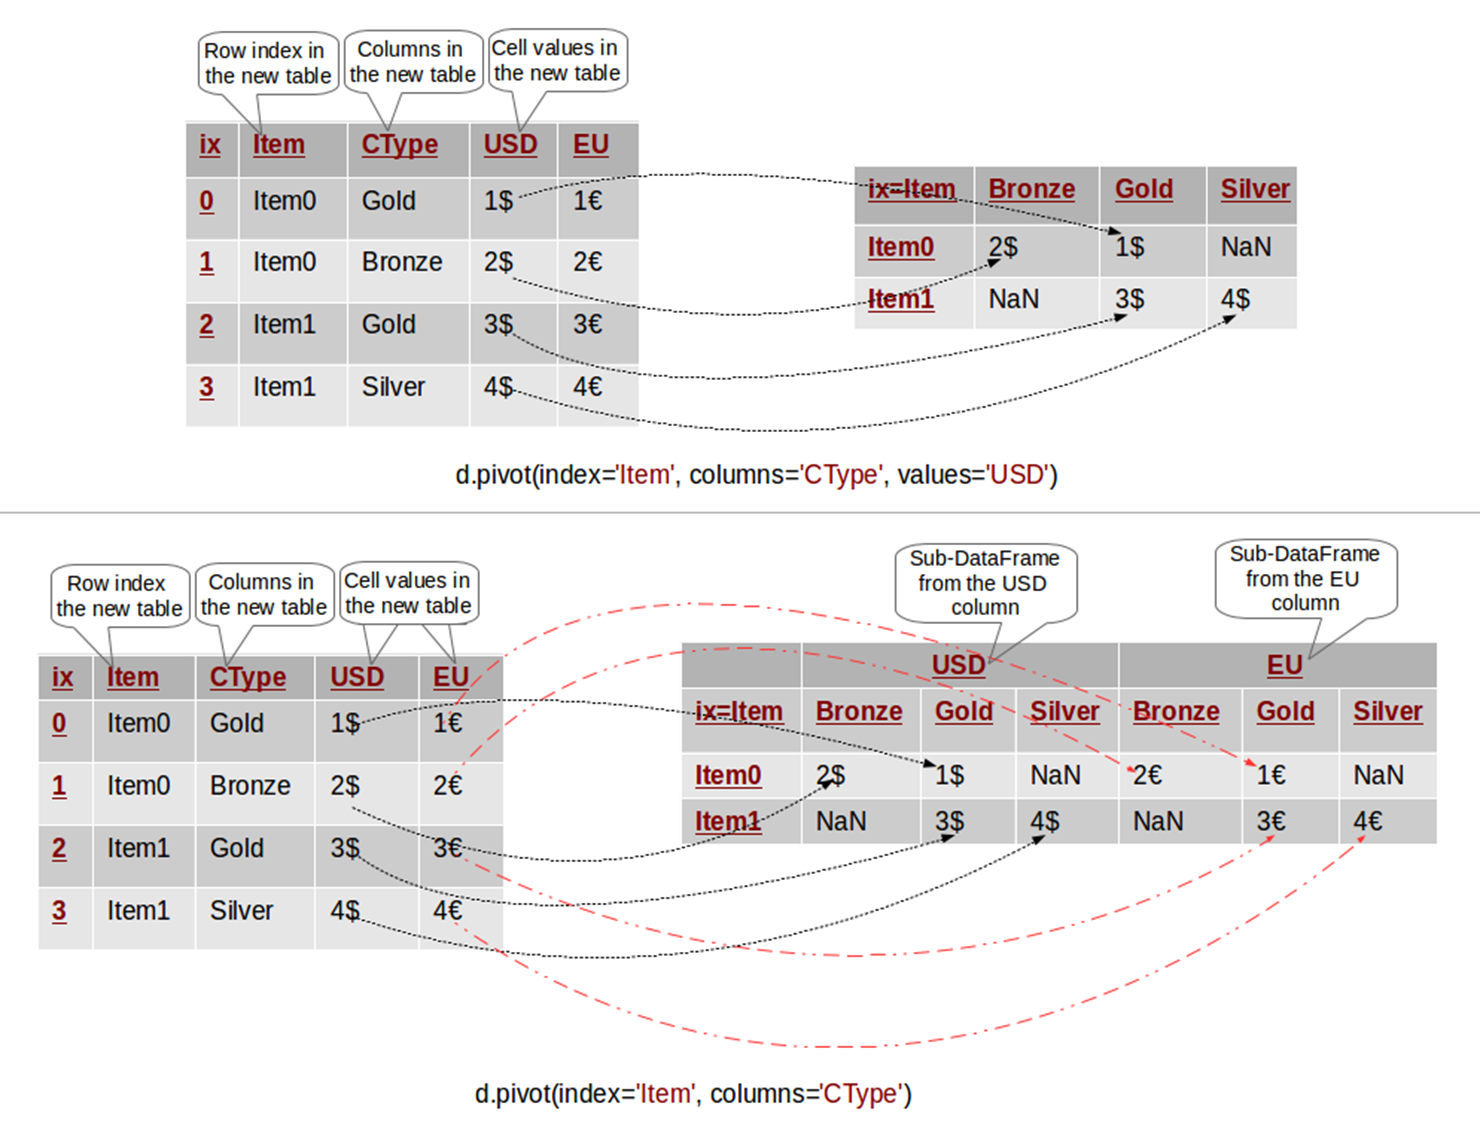

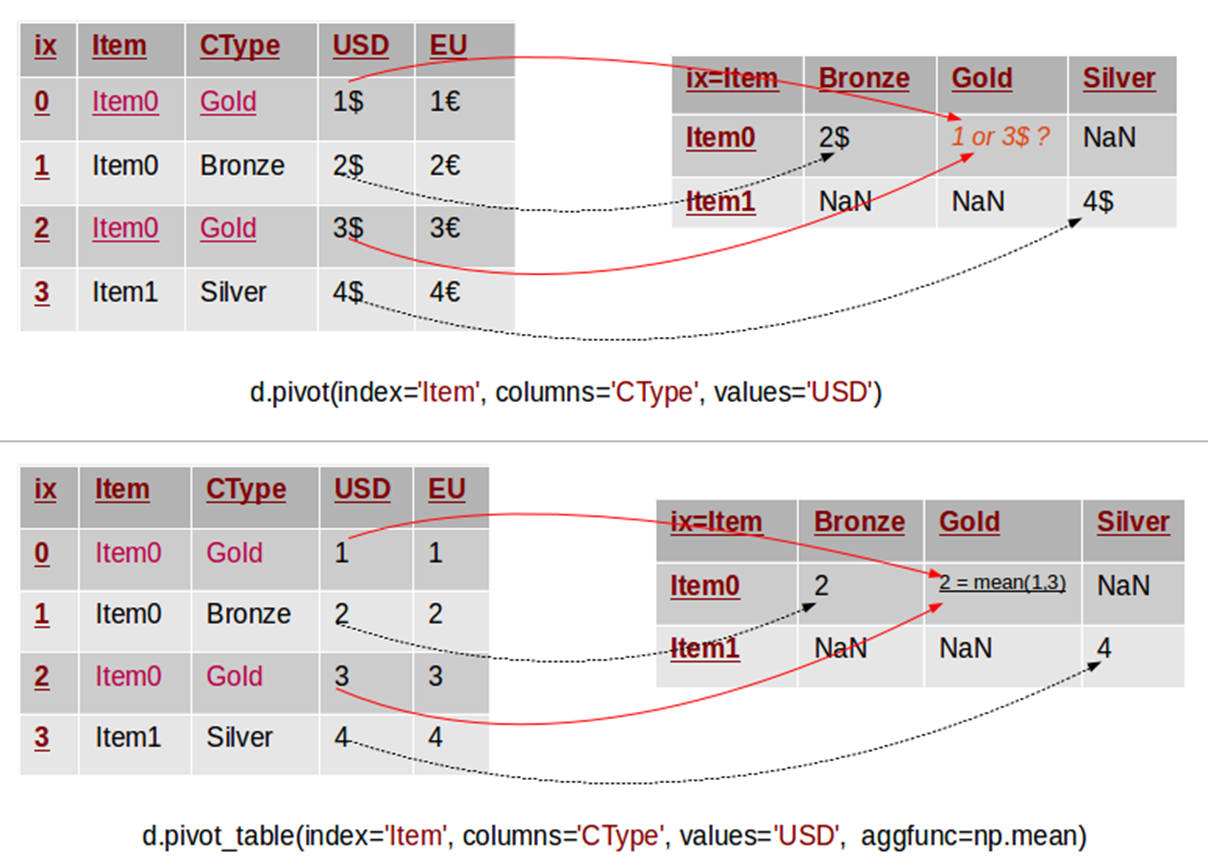

In [ ]:
#yeni index degeri koyup, yeni gruplandirmalar yapmak icin kullaniyoruz

In [ ]:
#mesela unique degerlere gore siniflandirma yapiyor
#hangi
d.pivot(index='items', columns='CType', values='USD') 
seklinde kullanimi var
#column'lara Ctype getir demek istiyorum, 3 unique deger goruyor, karsiligina degerini getiriyor
#item1'in bronz ve gold degeri yok o yuzden nan getiriyor
#item0'a ait 2 tane gold gozlemi var. 1 tane olsa onu getirecekti
#ama 2 taneyse, 1 or 3 seklinde yazdi. 
#boyle birden fazla gozlem varsa pivot degil pivot_table kullaniyoruz
#aggfunc=np.mean() methodu calisiyor ve ortalamasini alip koyuyor bu sefer
#pivot'ta arkaplanda aggfunc methodu olmadigi icin sorun cikiyor

In [9]:
data = {'gender':['male', 'female', 'female', 'male', 'female', 'male'],
        'sport':['tennis', 'tennis', 'basketball', 'football', 'voleyball', 'basketball'],
        'status':["professional","professional","professional","amateur","amateur","amateur"],
        'age':[20, 24, 26, 23, 22, 21],
        'height':[185, 172, 175, 178, 182, 196],
        'weight':[83, 58, 62, 80, 65, 90]}
df = pd.DataFrame(data)
df

gender       sport        status  age  height  weight
0    male      tennis  professional   20     185      83
1  female      tennis  professional   24     172      58
2  female  basketball  professional   26     175      62
3    male    football       amateur   23     178      80
4  female   voleyball       amateur   22     182      65
5    male  basketball       amateur   21     196      90

In [ ]:
#pivot_table pivotun daha genellestirilmis hali#
#pivot_table'da duplicate data uzerinden islem yapabiliyoruz
#aggfunc'in defaultu mean

In [26]:
df.pivot_table(index="gender", columns="sport", values=["age"], aggfunc="mean")
#values, index, columns, aggfunc var icinde
#degerleri benim istedigim gibi dondurur
#gender'da unique degerler male,female'di
#sport'un unique degeri basket,futbol, tenis ve voleybol ona gore siraladi
#value olarak da age'i getirdi
#female'in futbol kisminda kimse olmadigi icin nan degerle doldurdu
#value degerine, basket ve female'da hangi age degeri varsa onu getirir.
#birden fazla deger olursa ortalamasini alir getirir.

age                          
sport  basketball football tennis voleyball
gender                                     
female       26.0      NaN   24.0      22.0
male         21.0     23.0   20.0       NaN

In [27]:
df.pivot_table(index="gender", columns="sport", values=["age", "weight", "height", ], aggfunc="mean")

age                               height                  \
sport  basketball football tennis voleyball basketball football tennis   
gender                                                                   
female       26.0      NaN   24.0      22.0      175.0      NaN  172.0   
male         21.0     23.0   20.0       NaN      196.0    178.0  185.0   

                     weight                            
sport  voleyball basketball football tennis voleyball  
gender                                                 
female     182.0       62.0      NaN   58.0      65.0  
male         NaN       90.0     80.0   83.0       NaN

In [ ]:
#siralamayi default haliyle getirdi
#deger icermeyen kisimlara nan koydu yine
#index ve columns'un unique degerlerine gore gruplandirdi.

In [29]:
df.pivot(index="gender", columns="sport", values=["age", "weight", "height", ])

age                               weight                  \
sport  basketball football tennis voleyball basketball football tennis   
gender                                                                   
female       26.0      NaN   24.0      22.0       62.0      NaN   58.0   
male         21.0     23.0   20.0       NaN       90.0     80.0   83.0   

                     height                            
sport  voleyball basketball football tennis voleyball  
gender                                                 
female      65.0      175.0      NaN  172.0     182.0  
male         NaN      196.0    178.0  185.0       NaN

In [ ]:
#map'le degistirmek istersek icine sadece degistirmek istedigimi yazarim.
#bir degeri degistirmek istedigimizde loc, ve iloc kullan!

#mesela basketball'u degistirmek istiyorum diyelim 2. satirdaki female olan
#df.loc[2, "sport"]="tennis" seklinde yazar degistirirm.

In [31]:
df.loc[2, "sport"]="tennis"
df
#female'da 2 tane tennis oldu

gender       sport        status  age  height  weight
0    male      tennis  professional   20     185      83
1  female      tennis  professional   24     172      58
2  female      tennis  professional   26     175      62
3    male    football       amateur   23     178      80
4  female   voleyball       amateur   22     182      65
5    male  basketball       amateur   21     196      90

In [32]:
df.pivot_table(index="gender", columns="sport", values=["age", "weight", "height", ], aggfunc="mean")

age                               height                  \
sport  basketball football tennis voleyball basketball football tennis   
gender                                                                   
female        NaN      NaN   25.0      22.0        NaN      NaN  173.5   
male         21.0     23.0   20.0       NaN      196.0    178.0  185.0   

                     weight                            
sport  voleyball basketball football tennis voleyball  
gender                                                 
female     182.0        NaN      NaN   60.0      65.0  
male         NaN       90.0     80.0   83.0       NaN

In [ ]:
#yukarida napti, female'e denk gelen 2 tane tennis vardi
#bunun yasini nasil hesapladi
#arkasinda bir aggfunc.mean calisti ve ortalamasini aldi.
#birinin degeri 24 digeri 26 idi, ortalamasini alip age'e 25 yazdi
#ama pivot kullanmis olsaydim, arkasinda boyle bir aggfunc calismadigi icin hata verecekti


# Type of NaN Values

[SOURCE01](https://www.educative.io/edpresso/what-is-the-none-keyword-in-python), 
[SOURCE02](https://stackoverflow.com/questions/21095654/what-is-a-nonetype-object),
[SOURCE03](https://www.skytowner.com/explore/difference_between_none_and_nan_in_pandas), 
[SOURCE04](https://kegui.medium.com/what-is-the-difference-between-nan-none-pd-nan-and-np-nan-a8ee0532e2eb),
[SOURCE05](https://stackoverflow.com/questions/53436339/difference-between-np-nan-and-np-nan),
[SOURCE06](https://stackoverflow.com/questions/40309789/difference-between-nan-and-nan-in-python),
[SOURCE07](https://towardsdatascience.com/navigating-the-hell-of-nans-in-python-71b12558895b)

# Type of NaN Values
NaN = Not-a-Number
np.nan, belirsiz veya tanımlanamaz sayısal değerleri temsil etmek için kullanılır.
np.nan değeri, "sentinel" bir değer olarak kabul edilir ve herhangi bir değerle, hatta kendisiyle bile karşılaştırılamaz.
Sentinel; matematiksel hesaplamalarda belirsiz veya tanımlanamaz değerleri temsil etmek için kullanılır.
None; sentinel bir değerdir ve bir fonksiyonun veya metodun "boş" veya "tanımsız" bir değeri ifade etmesi için kullanılır.
Sütunun data tipi object ise "nan", sayısal ise "NaN" olur.

In [ ]:
#missing value ile ugrasirken karsimiza cikan degerler nan degerler
#ankette bazi sorular cvpsiz kaliyor mesela.
#ben ankette gelen cvplardan veriseti olustururken deger giremedigim yerlere nan deger giriyorum
#daha sonra cesitli bilgilerle doldurabilirsek dolduruyoruz, dolduramazsak drop yapiyoruz
#mesela gelirini soylemek istemeyen issiz birinin gelirine 0 yazabilirsin sonradan
#NaN=Not a Number
#sutunun data tipi object ise "nan", sayisal ise "NaN" olur.


In [6]:
id_no = ["P001", "P002", "P003", "P004", "P005", "P006", "P007", "P008", "P009", "P010", "P011"]
gender = ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M"]
status = ["FT", "PT", "-", "FT", "PT", "PT", "FT", "-", "PT", "FT", np.nan]
dept = ["DS", "FS", "AWS", "AWS", "DS", None, "FS", "FS", np.nan, "DS", "AWS"]
V1 = np.array([2, 3, 5, np.nan, 7, 1, np.nan, 10, 14, "-", 6])
V2 = np.array([8, np.nan, 5, 8, 11, np.nan, np.nan, 2, 3, 7, 9])
salary = np.array([np.nan, 54, 59, 120, 58, 75, None, 136, 60, 125, np.nan])
df0 = pd.DataFrame({
                   "id" : id_no,
                   "gender": gender,
                   "status": status,
                   "dept": dept,
                   "var1" : V1,
                   "var2" : V2,
                   "salary" : salary
                  })
df

NameError: name 'df' is not defined

In [36]:
df=df0.copy()
df

id gender status  dept var1  var2 salary
0   P001      M     FT    DS    2   8.0    NaN
1   P002      F     PT    FS    3   NaN     54
2   P003      M      -   AWS    5   5.0     59
3   P004      F     FT   AWS  nan   8.0    120
4   P005      M     PT    DS    7  11.0     58
5   P006      F     PT  None    1   NaN     75
6   P007      M     FT    FS  nan   NaN   None
7   P008      F      -    FS   10   2.0    136
8   P009      M     PT   NaN   14   3.0     60
9   P010      F     FT    DS    -   7.0    125
10  P011      M    NaN   AWS    6   9.0    NaN

In [37]:
df.info()
#Infosuna bakinca df’in:
#not-null count da veriyor bize. 11 gozlem var id column’da
#not-null yokmus id ve gender'da mesela.
#status'te bir null deger varmis. 10 non-null
#department'ta 9 non-null deger varmis. Yani 2 null
#mesela sayisal bir sutuna str ifade koyarsak, dtype object oluyor
#tipini de object olarak gordugu icin, nan degerleri Null gormuyor.
#null degerlerin tipi float
#None da null deger kabul edilir


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      11 non-null     object 
 1   gender  11 non-null     object 
 2   status  10 non-null     object 
 3   dept    9 non-null      object 
 4   var1    11 non-null     object 
 5   var2    8 non-null      float64
 6   salary  8 non-null      object 
dtypes: float64(1), object(6)
memory usage: 744.0+ bytes


In [38]:
type(np.nan)
#np.nan ile nan deger olusturuyoruz
#tipi float


float

In [39]:
type(None) #None in tipi ise NoneType diye gecer

NoneType

In [40]:
print("1", 0 * np.nan)
print("2", np.nan - np.nan)
print("3", np.nan + np.nan)
print("4", np.nan - 10)
print("5", np.nan + 10)
print("6", np.nan == np.nan)
print("7", 10 > np.nan)
print("8", np.inf > np.nan)
print("9", float('-inf') < np.nan < float('inf'))
print("10", np.nan is np.nan)
#kiyaslama yaptigin zaman genelde False cikiyor


1 nan
2 nan
3 nan
4 nan
5 nan
6 False
7 False
8 False
9 False
10 True


In [41]:
pd.Series([1, np.nan, np.NaN, None, 2])
#datatipi float cikti

0    1.0
1    NaN
2    NaN
3    NaN
4    2.0
dtype: float64

# Detecting Missing Values

In [44]:
#datasetindeki null degerleri sorgulama fonksiyonlari:
df.isnull()

id  gender  status   dept   var1   var2  salary
0   False   False   False  False  False  False    True
1   False   False   False  False  False   True   False
2   False   False   False  False  False  False   False
3   False   False   False  False  False  False   False
4   False   False   False  False  False  False   False
5   False   False   False   True  False   True   False
6   False   False   False  False  False   True    True
7   False   False   False  False  False  False   False
8   False   False   False   True  False  False   False
9   False   False   False  False  False  False   False
10  False   False    True  False  False  False    True

In [43]:
df.isna()

id  gender  status   dept   var1   var2  salary
0   False   False   False  False  False  False    True
1   False   False   False  False  False   True   False
2   False   False   False  False  False  False   False
3   False   False   False  False  False  False   False
4   False   False   False  False  False  False   False
5   False   False   False   True  False   True   False
6   False   False   False  False  False   True    True
7   False   False   False  False  False  False   False
8   False   False   False   True  False  False   False
9   False   False   False  False  False  False   False
10  False   False    True  False  False  False    True

In [45]:
df.notnull()

id  gender  status   dept  var1   var2  salary
0   True    True    True   True  True   True   False
1   True    True    True   True  True  False    True
2   True    True    True   True  True   True    True
3   True    True    True   True  True   True    True
4   True    True    True   True  True   True    True
5   True    True    True  False  True  False    True
6   True    True    True   True  True  False   False
7   True    True    True   True  True   True    True
8   True    True    True  False  True   True    True
9   True    True    True   True  True   True    True
10  True    True   False   True  True   True   False

In [ ]:
df.isnull().any()
#herhangi bir satirda null varsa true, yoksa false
#tek bir null varsa bile true doner

In [46]:
df.isnull().any(axis=1)
#satirlarda sutun sutun bakacak, bir tane bile null varsa True doner

0      True
1      True
2     False
3     False
4     False
5      True
6      True
7     False
8      True
9     False
10     True
dtype: bool

In [48]:
df[df.isnull().any(axis=1)]
#sadece null deger iceren sutunlari goruyoruz

id gender status  dept var1  var2 salary
0   P001      M     FT    DS    2   8.0    NaN
1   P002      F     PT    FS    3   NaN     54
5   P006      F     PT  None    1   NaN     75
6   P007      M     FT    FS  nan   NaN   None
8   P009      M     PT   NaN   14   3.0     60
10  P011      M    NaN   AWS    6   9.0    NaN

In [49]:
df.isnull().sum()
#kac tane null varsa onu getirir satir satir

id        0
gender    0
status    1
dept      2
var1      0
var2      3
salary    3
dtype: int64

In [50]:
df.isnull().sum().sum()
#df icindei tiplam null degerleri getirdi

9

# Converting Improper Values to NaN Values

In [4]:
df

NameError: name 'df' is not defined

In [52]:
df["var1"]

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9       -
10      6
Name: var1, dtype: object

In [58]:
df["var1"]=df["var1"].replace(to_replace='-', value=np.nan).astype("float")
#- yerine baska bir deger ata diyorum

In [59]:
df["var1"] #artik 3 tane null degerimiz var
#- isaretini aldi nan degerine donsuturdu
#cunku - str olarak kabul edildiginden null kabul edilmiyordu, object datatipinde gorunuyordu
#astype float olarak degistirince float olarak degistirmis oldum


0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [56]:
df["status"]=df["status"].replace(to_replace='-', value=np.nan)
df["status"]
#status'ta astype("float") yazmiyoruz, cunku icinde str degerler var status columnda

0      FT
1      PT
2     NaN
3      FT
4      PT
5      PT
6      FT
7     NaN
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [ ]:
df0.isnull().sum().sum()
#ilk default halinde 9 tane null vardi

In [60]:
df.isnull().sum().sum()
#

14

# Missing Value Handling Methods

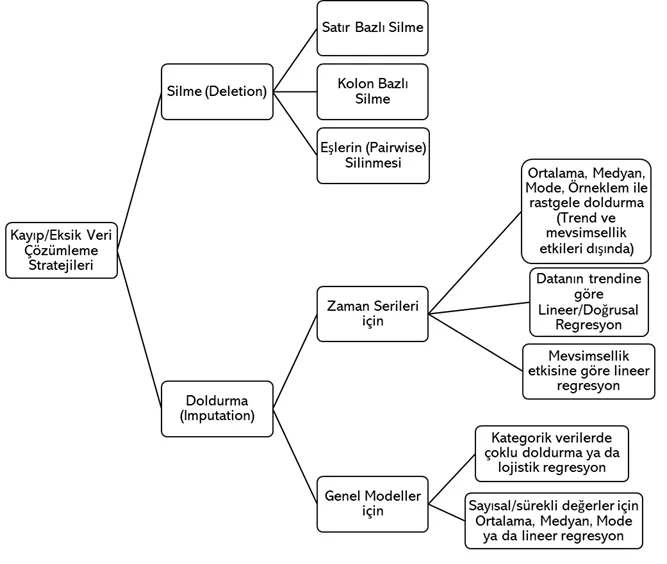

[SOURCE01](https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e), 
[SOURCE02](https://www.shiksha.com/online-courses/articles/handling-missing-values-beginners-tutorial/),
[SOURCE03](https://medium.com/geekculture/how-to-deal-with-missing-values-in-machine-learning-98e47f025b9c), 
[SOURCE04](https://yigitsener.medium.com/veri-biliminde-eksik-kay%C4%B1p-verilere-yakla%C5%9F%C4%B1m-stratejileri-ve-python-pandas-uygulamas%C4%B1-501fbf643795)

## dropna() & drop()

In [ ]:
#dolduramayacagimiz null degerleri droplamak icin kullaniyoruz
#kategorik veri tipinde, mod degerleri ile doldurabiliyoruz
#en cok tekrar eden mod degeri ile
#sayisal sutunlarda ise mesela, yas degerleri var diyelim
#mod degil de mean'e bakarsak daha anlamli bilgi verebilir
#datanin ruhuna uygun sekilde dolduruyorum


In [63]:
df.dropna(axis=0, how="any", inplace=False)
#how parametresi ile any all degerlerini girebiliyoruz
#default degeri any-yani bir tane bile null deger varsa drop etsin demek
#all ise hepsi null ise drop et demek
#bunun da inplace=True parametresi var
#boyle tek satir kaldi, cunku bir tane bile null alsa dropladi

id gender status dept  var1  var2 salary
4  P005      M     PT   DS   7.0  11.0     58

In [64]:
df.dropna(axis=1, how="any", inplace=False)
#sutunlar bazinda kontrol edip null deger varsa dusuruyor
#condition yaziyorum yani any ve all gibi

id gender
0   P001      M
1   P002      F
2   P003      M
3   P004      F
4   P005      M
5   P006      F
6   P007      M
7   P008      F
8   P009      M
9   P010      F
10  P011      M

In [65]:
df.drop([1,3,5]) #icine index, column, axis gibi seyler beliriyorum
#1,3,5.indexleri dusurdu satirlardan


id gender status dept  var1  var2 salary
0   P001      M     FT   DS   2.0   8.0    NaN
2   P003      M    NaN  AWS   5.0   5.0     59
4   P005      M     PT   DS   7.0  11.0     58
6   P007      M     FT   FS   NaN   NaN   None
7   P008      F    NaN   FS  10.0   2.0    136
8   P009      M     PT  NaN  14.0   3.0     60
9   P010      F     FT   DS   NaN   7.0    125
10  P011      M    NaN  AWS   6.0   9.0    NaN

In [67]:
df.drop(["var1", "var2"], axis=1)
#axis=1 yazmasaydim, defaultu axis=0 oldugu ucun, satirlar boyunca arayacak bulamayacakti
#o yuzden axis=1 olarak yazmam gerek

id gender status  dept salary
0   P001      M     FT    DS    NaN
1   P002      F     PT    FS     54
2   P003      M    NaN   AWS     59
3   P004      F     FT   AWS    120
4   P005      M     PT    DS     58
5   P006      F     PT  None     75
6   P007      M     FT    FS   None
7   P008      F    NaN    FS    136
8   P009      M     PT   NaN     60
9   P010      F     FT    DS    125
10  P011      M    NaN   AWS    NaN

In [ ]:
#bir sutunun dusmemesi icin icermesi gereken nan degerini yazabiliriz
df.dropna(axis=1, thresh=9),
#bu sekilde yazinca, null olmayan degerlerim 9'dan az olmasi halinde dusur demis oluyoruz


## Filling Missing Values (Imputation)

### Filling Numeric Variables

In [ ]:
df.fillna()
#null olanlari doldur anlaminda kullaniyoruz bunu
df["var1"].fillna(0)

In [68]:
df[["var1"]].fillna(df["var1"].mean()
#var1 sutununun ortalamasini almis, bunla doldurtmus
#median'a gore de doldurtabilirsiniz
            
                

SyntaxError: unexpected EOF while parsing (1394290370.py, line 5)

In [69]:
df.fillna(df.mean())
#butun sutunlara gider, her sutunun kendi ortalamasi ile null degerleri doldurur.


id gender status  dept  var1    var2   salary
0   P001      M     FT    DS   2.0   8.000   85.875
1   P002      F     PT    FS   3.0   6.625   54.000
2   P003      M    NaN   AWS   5.0   5.000   59.000
3   P004      F     FT   AWS   6.0   8.000  120.000
4   P005      M     PT    DS   7.0  11.000   58.000
5   P006      F     PT  None   1.0   6.625   75.000
6   P007      M     FT    FS   6.0   6.625   85.875
7   P008      F    NaN    FS  10.0   2.000  136.000
8   P009      M     PT   NaN  14.0   3.000   60.000
9   P010      F     FT    DS   6.0   7.000  125.000
10  P011      M    NaN   AWS   6.0   9.000   85.875

In [70]:
df.fillna({"dept": "Other", "var1": df.var1.mean(), "var2": df.var2.median()})
#ortalama median alamayacagim sutunlar icin mesela dept sutunu icin,
#null degerlere "other" desin dedik
#var1 icin de mean yapsin dedik
#hepsini tek satirda tanimlamak icin dict formatinin icinde atadik

id gender status   dept  var1  var2 salary
0   P001      M     FT     DS   2.0   8.0    NaN
1   P002      F     PT     FS   3.0   7.5     54
2   P003      M    NaN    AWS   5.0   5.0     59
3   P004      F     FT    AWS   6.0   8.0    120
4   P005      M     PT     DS   7.0  11.0     58
5   P006      F     PT  Other   1.0   7.5     75
6   P007      M     FT     FS   6.0   7.5   None
7   P008      F    NaN     FS  10.0   2.0    136
8   P009      M     PT  Other  14.0   3.0     60
9   P010      F     FT     DS   6.0   7.0    125
10  P011      M    NaN    AWS   6.0   9.0    NaN

In [71]:
#mesela kategorik sutunlarda mode ile doldur diyebiliriz
df.dept.mode()

0    AWS
1     DS
2     FS
Name: dept, dtype: object

In [72]:
df.dept.mode()[0] #en cok tekrar eden AWS imis

'AWS'

In [73]:
df.dept.fillna(df.dept.mode()[0])
#en cok tekrar eden deger ile doldurmus oldu
#mode func bu ise yaradi

0      DS
1      FS
2     AWS
3     AWS
4      DS
5     AWS
6      FS
7      FS
8     AWS
9      DS
10    AWS
Name: dept, dtype: object

In [ ]:
df.dept.fillna(method="bfill")
#bfill methodu ile, index sirasina bak, sonra gelen deger ile doldur demis oluyoruz
#backfill 

In [ ]:
df.dept.fillna(method="ffill")
#index sirasina bak, bir onceki deger ile doldur demek
#randomizelik katmak istersek boyle oncekiyle, sonrakiyle dolduruyoruz
#forwardfill
#inplace=True bunun icin de gecerli

In [ ]:
#peki en son deger null ise, sonraki deger ile doldur dedik mesela, sonda deger yok
#bos kalir o zaman
#napacagiz bu durumda, bfill yaptiysak ffill, ffill yaptiysak da bfill yapmak lazim


### Filling Categorical Variables

In [10]:
df

gender       sport        status  age  height  weight
0    male      tennis  professional   20     185      83
1  female      tennis  professional   24     172      58
2  female  basketball  professional   26     175      62
3    male    football       amateur   23     178      80
4  female   voleyball       amateur   22     182      65
5    male  basketball       amateur   21     196      90

In [11]:
df.loc[df["salary"] >= 100, "status"].fillna(df.loc[df["salary"] >= 100, "status"].mode()[0], inplace= True)

KeyError: 'salary'

In [12]:
df.loc[df["salary"] >= 100, "status"]

KeyError: 'salary'

In [14]:
df.loc[df["salary"] >= 100, "status"] = df.loc[df["salary"] >= 100, "status"].fillna(df.loc[df["salary"] >= 100, "status"].mode()[0])


KeyError: 'salary'

In [ ]:
df.loc[df["salary"] < 100, "status"] = df.loc[df["salary"] < 100, "status"].fillna(df.loc[df["salary"] < 100, "status"].mode()[0])

In [ ]:
#bazi metodlarda inplace True, baziarinda ise yeni bir df'e atayarak mesela
#kalici degisiliklik yapabiliyoruz

In [ ]:
#belirli bir data seti atadik
#100'un uzerindeyse, status'teki karslikilarina gore doldur
#100'un altinda ise de status'teki karsiliklarina gore doldur dedk
#fillna ile atama yaptik bu sekilde
#onemli olan data setinin ruhuna yakiri hareket etmeme
#cesitli istatistiksel moethodlar da kullanabilirim
#bfill, ffill de kullanabilirim
#duruma gore ayarlayyip ona gore data manipulation yapiyorum

In [13]:
df["status"].fillna(df.groupby(["gender", "dept"])["status"].transform(lambda x: x.mode()[0]), inplace=True)

KeyError: 'dept'

In [15]:
df.loc[df["salary"] >= 100, "status"].fillna(df.loc[df["salary"] >= 100, "status"].mode()[0], inplace=True)



KeyError: 'salary'

In [16]:
df.loc[df["salary"] >= 100, "status"] = df.loc[df["salary"] >= 100, "status"].fillna(df.loc[df["salary"] >= 100, "status"].mode()[0])



KeyError: 'salary'

In [17]:
df.loc[df["salary"] < 100, "status"] = df.loc[df["salary"] < 100, "status"].fillna(df.loc[df["salary"] < 100, "status"].mode()[0])

KeyError: 'salary'

In [18]:
df["status"].fillna(df.groupby(["gender", "dept"])["status"].transform(lambda x: x.mode()[0]), inplace=True)

KeyError: 'dept'

In [19]:
df

gender       sport        status  age  height  weight
0    male      tennis  professional   20     185      83
1  female      tennis  professional   24     172      58
2  female  basketball  professional   26     175      62
3    male    football       amateur   23     178      80
4  female   voleyball       amateur   22     182      65
5    male  basketball       amateur   21     196      90

In [21]:
df["salary"].fillna(df.groupby(["status,"dept"])["salary"].transform("mean"), inplace=True)df["salary"].fillna(df.groupby(["status", "dept"])["salary"].transform("mean"), inplace=True)
                                #status ve dpt'e gore siniflandirdi
                                #salary'i cagirdi, ve salarayi doldurdu

SyntaxError: invalid syntax (16355112.py, line 1)

In [22]:
df["var1"].fillna(df.groupby(["gender", "status"])["var1"].transform("mean"), inplace=True)

KeyError: 'var1'

In [23]:
df["var1"].fillna(df.groupby(["status", "status"])["var2"].transform("mean"), inplace=True)

KeyError: 'var1'

In [ ]:
#

### Filling by condition & group

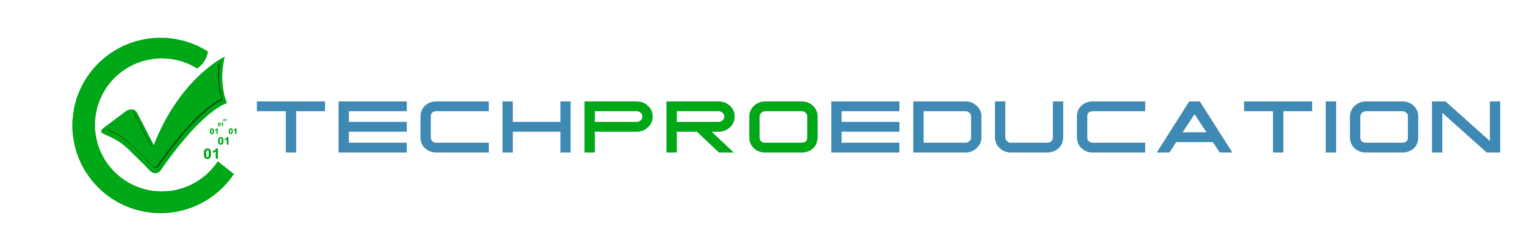